# MLOPS Assignment

## Data Loading

In [114]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from pycaret.regression import *


In [7]:
# target = sellijngprice
melbourne_data = pd.read_csv('Datasets/Datasets/01_Melbourne_Residential.csv')

In [8]:
melbourne_data.head()

,Suburb,Address,Rooms,Type,Price,Method,Seller,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Region,Propertycount
0,Airport West,154 Halsey Rd,3,t,840000,PI,Nelson,3/9/2023,13.5,3042,...,2,1.0,303,225.0,2016.0,Moonee Valley,-37.7180,144.8780,Western Metropolitan,3464
1,Albert Park,105 Kerferd Rd,2,h,1275000,S,hockingstuart,3/9/2023,3.3,3206,...,1,0.0,120,82.0,1900.0,Port Phillip,-37.8459,144.9555,Southern Metropolitan,3280
2,Albert Park,85 Richardson St,2,h,1455000,S,Thomson,3/9/2023,3.3,3206,...,1,0.0,159,NaN,NaN,Port Phillip,-37.8450,144.9538,Southern Metropolitan,3280
3,Alphington,6 Smith St,4,h,2000000,S,Brace,3/9/2023,6.4,3078,...,2,4.0,853,263.0,1930.0,Darebin,-37.7707,145.0318,Northern Metropolitan,2211
4,Alphington,5/6 Yarralea St,3,h,1110000,S,Jellis,3/9/2023,6.4,3078,...,2,2.0,208,NaN,2013.0,Yarra,-37.7854,145.0325,Northern Metropolitan,2211


In [10]:
## Melbourne Residential Dataset
# Check data types and missing values
melbourne_data.info()

# Check for missing values
melbourne_data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  int64  
 5   Method         13580 non-null  object 
 6   Seller         13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  int64  
 10  Bedroom2       13580 non-null  int64  
 11  Bathroom       13580 non-null  int64  
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  int64  
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
Seller              0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Region              0
Propertycount       0
dtype: int64

This indicates that there are null values present in Car, BuildingArea, Yearbuilt, CouncilArea. Dropping rows that contain null values for Yearbuilt and Car is the best course of action for these columns as there are no reliable methods to impute the missing data. However, missing BuildingArea data can be imputated using the Landsize data reliably. The Date column is not in a useble dateformat, processing would be required to use this date data effectively. 

In [24]:
melbourne_data['Region'].unique()

array(['Western Metropolitan', 'Southern Metropolitan',
       'Northern Metropolitan', 'Eastern Metropolitan',
       'South-Eastern Metropolitan', 'Eastern Victoria',
       'Northern Victoria', 'Western Victoria'], dtype=object)

## Data Exploration

In [197]:
print(df['Method'].unique())
print(df['Region'].unique())
print(df['Type'].unique())
print(df['CouncilArea'].unique())

['PI' 'S' 'VB' 'SP' 'SA']
['Western Metropolitan' 'Southern Metropolitan' 'Northern Metropolitan'
 'Eastern Metropolitan' 'South-Eastern Metropolitan' 'Eastern Victoria'
 'Northern Victoria' 'Western Victoria']
['t' 'h' 'u']
['Moonee Valley' 'Port Phillip' 'Darebin' 'Yarra' 'Hobsons Bay'
 'Stonnington' 'Boroondara' 'Monash' 'Glen Eira' 'Whitehorse'
 'Maribyrnong' 'Bayside' 'Moreland' 'Manningham' 'Banyule' 'Melbourne'
 'Kingston' 'Brimbank' 'Hume' 'Knox' 'Maroondah' 'Casey' 'Melton'
 'Greater Dandenong' 'Nillumbik' 'Whittlesea' 'Frankston' 'Macedon Ranges'
 'Yarra Ranges' 'Wyndham' nan 'Moorabool' 'Cardinia' 'Unavailable']


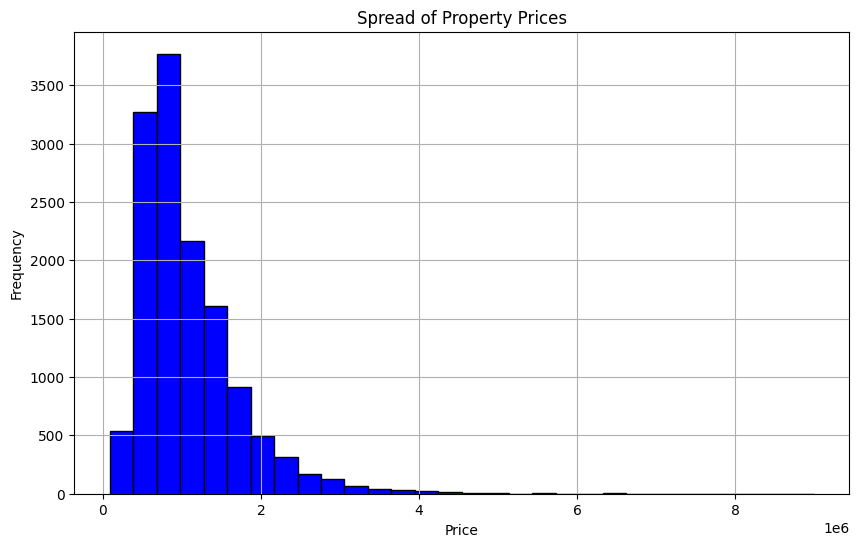

In [6]:
plt.figure(figsize=(10, 6))
plt.hist(df['Price'], bins=30, color='blue', edgecolor='black')
plt.title('Spread of Property Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

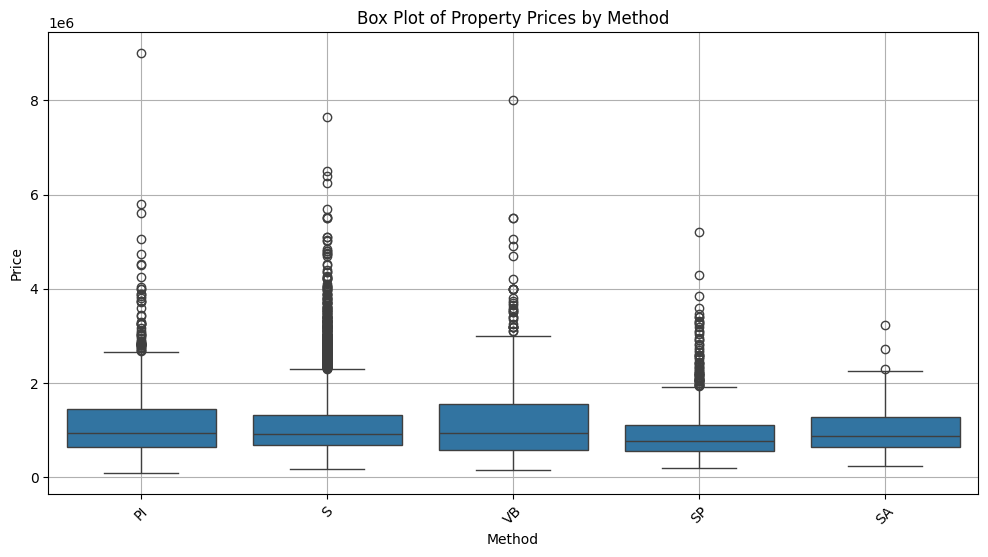

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'Method' is a categorical column and 'Price' is numeric
plt.figure(figsize=(12, 6))
sns.boxplot(x="Method", y="Price", data=df)

plt.title("Box Plot of Property Prices by Method")
plt.xlabel("Method")
plt.ylabel("Price")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


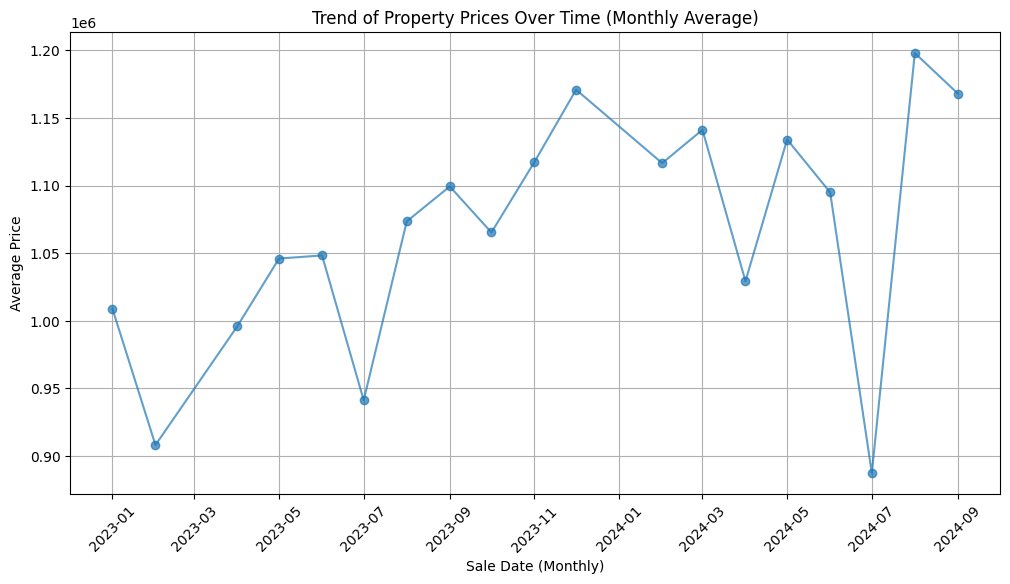

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure 'Date' column is in datetime format
df["Date"] = pd.to_datetime(df["Date"])

# Group by month and calculate the average price
df_grouped = df.groupby(df["Date"].dt.to_period("M"))["Price"].mean()

# Convert period index back to datetime for plotting
df_grouped.index = df_grouped.index.to_timestamp()

# Plot the line chart
plt.figure(figsize=(12, 6))
plt.plot(df_grouped.index, df_grouped, marker="o", linestyle="-", alpha=0.7)
plt.xlabel("Sale Date (Monthly)")
plt.ylabel("Average Price")
plt.title("Trend of Property Prices Over Time (Monthly Average)")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [25]:
from scipy.stats import f_oneway

# Grouping the prices by Region and running ANOVA
grouped = [df_cleaning[df_cleaning['Region'] == region]['Price'] for region in df_cleaning['Region'].unique()]
f_stat, p_value = f_oneway(*grouped)

print(f"ANOVA Test - F-statistic: {f_stat}, p-value: {p_value}")


ANOVA Test - F-statistic: 223.57106705841264, p-value: 6.8992417806e-314


In [40]:
print(melbourne_data[['YearBuilt', 'Price']].corr())


           YearBuilt     Price
YearBuilt   1.000000 -0.323617
Price      -0.323617  1.000000


Although there is an abnomally at 2024-07, it can be seen that the date that the property is sold generally increased over time. 

## Data Prep

In [189]:
# df_cleaning = df.drop(columns=["Suburb", "Address", "Seller", "Postcode", "CouncilArea"])
df_cleaning = melbourne_data.drop(columns=['Postcode', 'Seller', 'Address'])

Suburb is dropped as it can be replaced with region, Due to the YearBuilt column having too many null values (nearly 50%) it is dropped as there is no reliable way to recover the data.

In [190]:
# df_cleaning['BuildingArea'] = df_cleaning['BuildingArea'].fillna(df_cleaning['Landsize'])
df_cleaning['BuildingArea'] = df_cleaning['BuildingArea'].fillna(df_cleaning['BuildingArea'].median())
#Handle missing values
df_cleaning['Car'] = df_cleaning['Car'].fillna(df_cleaning['Car'].median())
df_cleaning = df_cleaning.dropna(subset=['CouncilArea'])
df_cleaning['YearBuilt'] = df_cleaning['YearBuilt'].fillna(df_cleaning['YearBuilt'].median())

# Calculating Age
df_cleaning["Date"] = pd.to_datetime(df_cleaning["Date"], format="%d/%m/%Y")
# Extract the sale year
df_cleaning['Sale Year'] = df_cleaning['Date'].dt.year
# Calculate the Age of the Residence
df_cleaning['Age'] = df_cleaning['Sale Year'] - df_cleaning['YearBuilt']
df_cleaning['Age'] = df_cleaning['Age'].astype(int)


In [183]:
df_cleaning.info()


<class 'pandas.core.frame.DataFrame'>
Index: 12211 entries, 0 to 13579
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Suburb         12211 non-null  object        
 1   Rooms          12211 non-null  int64         
 2   Type           12211 non-null  object        
 3   Price          12211 non-null  int64         
 4   Method         12211 non-null  object        
 5   Date           12211 non-null  datetime64[ns]
 6   Distance       12211 non-null  float64       
 7   Bedroom2       12211 non-null  int64         
 8   Bathroom       12211 non-null  int64         
 9   Car            12211 non-null  float64       
 10  Landsize       12211 non-null  int64         
 11  BuildingArea   12211 non-null  float64       
 12  YearBuilt      12211 non-null  float64       
 13  CouncilArea    12211 non-null  object        
 14  Lattitude      12211 non-null  float64       
 15  Longtitude     12211 non

In [177]:
df_cleaning.head()

,Suburb,Rooms,Type,Price,Method,Date,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Region,Propertycount,Sale Year,Age
0,Airport West,3,t,840000,PI,2023-09-03,13.5,3,2,1.0,303,225.0,2016.0,Moonee Valley,-37.7180,144.8780,Western Metropolitan,3464,2023,7
1,Albert Park,2,h,1275000,S,2023-09-03,3.3,2,1,0.0,120,82.0,1900.0,Port Phillip,-37.8459,144.9555,Southern Metropolitan,3280,2023,123
2,Albert Park,2,h,1455000,S,2023-09-03,3.3,2,1,0.0,159,126.0,1970.0,Port Phillip,-37.8450,144.9538,Southern Metropolitan,3280,2023,53
3,Alphington,4,h,2000000,S,2023-09-03,6.4,3,2,4.0,853,263.0,1930.0,Darebin,-37.7707,145.0318,Northern Metropolitan,2211,2023,93
4,Alphington,3,h,1110000,S,2023-09-03,6.4,3,2,2.0,208,126.0,2013.0,Yarra,-37.7854,145.0325,Northern Metropolitan,2211,2023,10


# Feature Selection

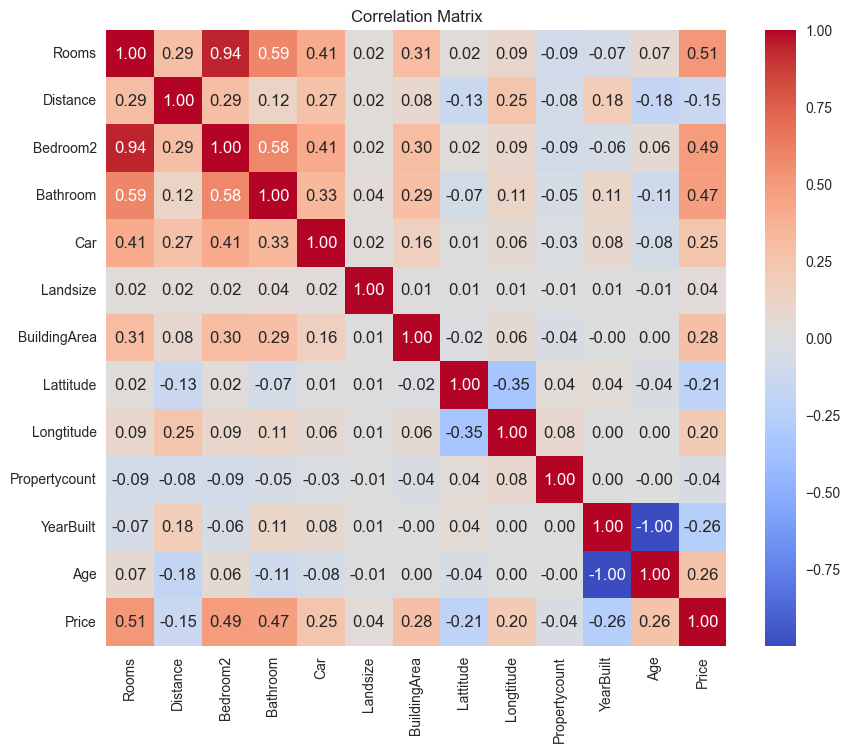

In [156]:

# Select numerical columns
numerical_cols = ['Rooms', 'Distance', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'Lattitude', 'Longtitude', 'Propertycount', 'YearBuilt', 'Age']

# Compute the correlation matrix
correlation_matrix = df_cleaning[numerical_cols + ['Price']].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

In [184]:
from sklearn.feature_selection import f_regression

# Select numerical features (excluding target variable)
numerical_cols = df_cleaning.select_dtypes(include=['number']).columns.drop('Price')

# Perform ANOVA F-test
f_stat, p_values = f_regression(df_cleaning[numerical_cols], df_cleaning['Price'])

# Combine results into a DataFrame
anova_results = pd.DataFrame({'Feature': numerical_cols, 'F-statistic': f_stat, 'p-value': p_values})
anova_results = anova_results.sort_values(by='p-value')

# Display results
print(anova_results)


          Feature  F-statistic        p-value
0           Rooms  4303.773852   0.000000e+00
2        Bedroom2  3804.068166   0.000000e+00
3        Bathroom  3536.668705   0.000000e+00
6    BuildingArea  1036.503856  2.415445e-218
12            Age   876.713265  3.926200e-186
7       YearBuilt   875.721445  6.239508e-186
4             Car   804.440042  1.969998e-171
8       Lattitude   548.792040  9.396502e-119
9      Longtitude   516.286051  5.612986e-112
1        Distance   266.426228   2.888716e-59
5        Landsize    18.157975   2.048414e-05
10  Propertycount    16.888865   3.989236e-05
11      Sale Year     2.768576   9.615731e-02


From this information, dropping Building Area, Bedroom2 and Property count as Building Area is highly correlated with Landsize while property count is statistically less significant. YearBuilt is replaced by Age

In [191]:
# Handled by pycaret
df_cleaning = df_cleaning.drop(columns=["Bedroom2", 'BuildingArea', 'Propertycount', 'YearBuilt', 'Date'])

In [166]:
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import LabelEncoder

# Categorical features (excluding the target variable)
categorical_cols = ['Type', 'CouncilArea', 'Region', 'Method', 'Suburb']

# Convert categorical variables to numerical codes (before one-hot encoding)
df_encoded = df_cleaning[categorical_cols].apply(lambda x: LabelEncoder().fit_transform(x))

# Perform ANOVA F-test
f_stat, p_values = f_classif(df_encoded, df_cleaning['Price'])

# Combine results into a DataFrame
anova_results = pd.DataFrame({'Feature': df_encoded.columns, 'F-statistic': f_stat, 'p-value': p_values})

# Display the results
print(anova_results)


       Feature  F-statistic       p-value
0         Type     3.873054  0.000000e+00
1  CouncilArea     1.186716  1.288599e-07
2       Region     1.057810  4.691391e-02
3       Method     0.923348  9.899573e-01
4       Suburb     1.095116  3.319137e-03


In [193]:
# although suburb is more significant than region, Region is used over suburb as it has significanlty less number of features
df_cleaning = df_cleaning.drop(columns=['Method', 'Suburb', 'Lattitude', 'Longtitude', 'Sale Year'])

In [194]:
df_cleaning.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12211 entries, 0 to 13579
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Rooms        12211 non-null  int64  
 1   Type         12211 non-null  object 
 2   Price        12211 non-null  int64  
 3   Distance     12211 non-null  float64
 4   Bathroom     12211 non-null  int64  
 5   Car          12211 non-null  float64
 6   Landsize     12211 non-null  int64  
 7   CouncilArea  12211 non-null  object 
 8   Region       12211 non-null  object 
 9   Age          12211 non-null  int32  
dtypes: float64(2), int32(1), int64(4), object(3)
memory usage: 1001.7+ KB


In [195]:
df_cleaning.to_csv('processed_data.csv', index=False)


## Stupidly doing scaling and one hot encoding

In [110]:
# Onehot endcoding
df_encoded = pd.get_dummies(df_cleaning, columns=['Type', 'CouncilArea', 'Region'], drop_first=True)


In [111]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12211 entries, 0 to 13579
Data columns (total 50 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Rooms                              12211 non-null  int64  
 1   Price                              12211 non-null  int64  
 2   Distance                           12211 non-null  float64
 3   Bathroom                           12211 non-null  int64  
 4   Car                                12211 non-null  float64
 5   Landsize                           12211 non-null  int64  
 6   YearBuilt                          12211 non-null  float64
 7   Lattitude                          12211 non-null  float64
 8   Longtitude                         12211 non-null  float64
 9   Type_t                             12211 non-null  bool   
 10  Type_u                             12211 non-null  bool   
 11  CouncilArea_Bayside                12211 non-null  bool   


### Scaling

In [112]:
from sklearn.preprocessing import MinMaxScaler

# List of numerical columns that need scaling
numerical_cols = ['Rooms', 'Distance', 'Bathroom', 'Car', 'Landsize', 'YearBuilt', 
                  'Lattitude', 'Longtitude']

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Apply the scaling
df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])


In [113]:
df_encoded.head()

,Rooms,Price,Distance,Bathroom,Car,Landsize,YearBuilt,Lattitude,Longtitude,Type_t,...,CouncilArea_Wyndham,CouncilArea_Yarra,CouncilArea_Yarra Ranges,Region_Eastern Victoria,Region_Northern Metropolitan,Region_Northern Victoria,Region_South-Eastern Metropolitan,Region_Southern Metropolitan,Region_Western Metropolitan,Region_Western Victoria
0,0.222222,840000,0.284810,0.250,0.1,0.000700,0.997567,0.640352,0.407651,True,...,False,False,False,False,False,False,False,False,True,False
1,0.111111,1275000,0.069620,0.125,0.0,0.000277,0.856448,0.464050,0.478457,False,...,False,False,False,False,False,False,False,True,False,False
2,0.111111,1455000,0.069620,0.125,0.0,0.000367,0.941606,0.465291,0.476904,False,...,False,False,False,False,False,False,False,True,False,False
3,0.333333,2000000,0.135021,0.250,0.4,0.001970,0.892944,0.567709,0.548166,False,...,False,False,False,False,True,False,False,False,False,False
4,0.222222,1110000,0.135021,0.250,0.2,0.000480,0.993917,0.547446,0.548806,False,...,False,True,False,False,True,False,False,False,False,False


# Training

In [134]:
# Cannot ignore this column in the set up for some reason

In [144]:
from sklearn.model_selection import train_test_split

# Split the data into train and test sets
train_data, test_data = train_test_split(df_cleaning, test_size=0.2, random_state=123)

# Initialize PyCaret setup with training data
setup(data=train_data, target='Price', session_id=123, 
      normalize=True, 
      transformation=True, 
      remove_outliers=True, 
      remove_multicollinearity=True, 
      multicollinearity_threshold=0.9, 
      ignore_features=['Address', 'Date'])


,Description,Value
0,Session id,123
1,Target,Price
2,Target type,Regression
3,Original data shape,"(9768, 21)"
4,Transformed data shape,"(9426, 31)"
5,Transformed train set shape,"(6495, 31)"
6,Transformed test set shape,"(2931, 31)"
7,Ignore features,2
8,Numeric features,12
9,Categorical features,6


In [145]:
best_model = compare_models()


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,159592.0594,71066873890.4977,264548.2912,0.8262,0.1935,0.1502,1.5000
lightgbm,Light Gradient Boosting Machine,165817.2955,74956409227.1796,271463.7694,0.8171,0.2005,0.1569,0.3150
xgboost,Extreme Gradient Boosting,171119.0672,82270054419.4086,284516.7942,0.7984,0.2084,0.1616,0.3540
rf,Random Forest Regressor,173508.1747,85645254487.6405,290335.6544,0.7907,0.2090,0.1637,0.5660
et,Extra Trees Regressor,175584.7021,85864766580.9729,290700.2199,0.7903,0.2101,0.1648,0.4270
gbr,Gradient Boosting Regressor,182785.5543,86487754997.6472,291960.7117,0.7888,0.2208,0.1762,0.2770
knn,K Neighbors Regressor,215113.8793,123537717447.6165,349641.0254,0.6967,0.2574,0.2034,0.1330
ridge,Ridge Regression,246373.3501,135962000466.6220,366859.5376,0.6663,0.4774,0.2729,0.1100
lasso,Lasso Regression,246379.7329,135962063668.6479,366859.7286,0.6663,0.4776,0.2729,0.6920
br,Bayesian Ridge,246195.4551,135962179573.6981,366856.8725,0.6663,0.4750,0.2724,0.1190


In [146]:
tuned_model = tune_model(best_model)


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,164350.7325,74722134350.9465,273353.4971,0.7906,0.2046,0.1592
1,157429.3711,65162926197.2216,255270.3003,0.8134,0.1935,0.1555
2,166216.2893,85887413965.1452,293065.5455,0.8064,0.2035,0.1526
3,168488.3743,72337984542.6724,268957.2169,0.8220,0.1996,0.1567
4,154244.9645,53626259205.5563,231573.4424,0.8610,0.1861,0.1460
5,153710.4182,58082688566.5299,241003.5032,0.8486,0.1914,0.1488
6,168325.1302,74260755127.6412,272508.2662,0.8188,0.1967,0.1497
7,165081.4126,62258547837.7414,249516.6284,0.8124,0.2135,0.1687
8,170680.7076,89791570747.7915,299652.4166,0.7947,0.2147,0.1667


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [147]:
evaluate_model(tuned_model)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [148]:
# Use the tuned model to make predictions on the test data
predictions = predict_model(tuned_model, data=test_data)

# View the predictions
print(predictions)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,156749.2936,70903863935.5974,266277.7947,0.8299,0.1973,0.1528


                 Suburb          Address  Rooms Type Method    Seller  \
2752       Airport West    2b Roberts Rd      3    u      S     Barry   
5660          Reservoir     60 Powell St      3    h      S       Ray   
2350            Niddrie     87 Hotham Rd      2    h      S     Barry   
3670     Brunswick East    215 Weston St      3    h      S    Nelson   
10679          Carnegie      8 Yendon Rd      3    h      S  Woodards   
...                 ...              ...    ...  ...    ...       ...   
1352       Balwyn North       3 Clive Ct      4    h     PI        RW   
10406      Clifton Hill  1/493 Hoddle St      2    u     SP    Jellis   
2383          Reservoir    1/65 Keon Pde      3    u      S       Ray   
4952   Hoppers Crossing    7 Berberis Pl      4    h      S     Barry   
5191         Camberwell    6 Kingsley St      4    h      S  Marshall   

             Date  Distance  Postcode  Bedroom2  ...  Landsize  BuildingArea  \
2752     3/6/2024      10.4      3042      

In [149]:
# Save the predictions to a CSV file
predictions.to_csv('test_predictions.csv', index=False)
